In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#read in data
outfit_data = pd.read_csv('dataset/outfit_data.csv')
product_data = pd.read_csv('dataset/product_data.csv')

In [10]:
product_data.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
0,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg
1,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg
2,53030601-81,81,ROSA PASTEL,PINK,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg
3,53050730-15,15,MOSTAZA,YELLOW,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg
4,53070773-70,70,ROJO,RED,Female,Adult,SHE,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg


In [11]:
#show unique values of des_product_type
product_data['des_product_family'].unique()

array(['Trousers', 'Jeans', 'Dresses', 'Shirt', 'Sweater', 'Skirts',
       'Jewellery', 'Bags', 'Glasses', 'Wallets & cases', 'Shorts',
       'Tops', 'Belts and Ties', 'Jumpsuit', 'Jackets', 'Coats',
       'Footwear', 'Hats, scarves and gloves', 'T-shirt', 'Blazers',
       'Gadgets', 'Swimwear', 'Vest', 'Fragances', 'Cardigans',
       'Trenchcoats', 'Puffer coats', 'Outer Vest',
       'Leggings and joggers', 'Deco Accessories', 'Poloshirts',
       'Intimate', 'Sweatshirts', 'Deco Textiles', 'Bedding', 'Bodysuits',
       'Leather jackets', 'Parkas', 'Glassware'], dtype=object)

In [12]:
#delete all rows with des_product_family in ['Fragances', 'Deco Accessories', 'Intimate', 'Deco Textils', 'Bedding']
product_data = product_data[~product_data['des_product_family'].isin(['Fragances', 'Deco Accessories', 'Intimate', 'Deco Textiles', 'Bedding'])]


In [13]:
#show a row with des_product_family == 'Deco Textils'
product_data[product_data['des_product_family'] == 'Gadgets'].head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
58,57090027-99,99,NEGRO,GREY,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Gadgets,Umbrella,datathon/images/2023_57090027_99.jpg
485,57040259-05,05,CRUDO,WHITE,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Gadgets,Beach Towel,datathon/images/2023_57040259_05.jpg
1137,57000031-68,68,MALVA,PURPLE,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Gadgets,Umbrella,datathon/images/2023_57000031_68.jpg
1812,57000030-88,88,FUCSIA,PINK,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Gadgets,Umbrella,datathon/images/2023_57000030_88.jpg
1911,57030028-59,59,PETROLEO,BLUE,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Accessories,Gadgets,Umbrella,datathon/images/2023_57030028_59.jpg


In [14]:
columns = ['cod_modelo_color', 'des_agrup_color_eng', 'des_sex', 'des_age',
       'des_line', 'des_fabric', 'des_product_category',
       'des_product_type', 'des_filename']

In [15]:
#select columns
product_data = product_data[columns]
product_data.head()

,cod_modelo_color,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_type,des_filename
0,41085800-02,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers,datathon/images/2019_41085800_02.jpg
1,53000586-TO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,datathon/images/2019_53000586_TO.jpg
2,53030601-81,PINK,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53030601_81.jpg
3,53050730-15,YELLOW,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dress,datathon/images/2019_53050730_15.jpg
4,53070773-70,RED,Female,Adult,SHE,P-PLANA,Tops,Shirt,datathon/images/2019_53070773_70.jpg


In [16]:
columns_to_encode = product_data.columns.difference(['cod_modelo_color', 'des_filename'])

# Perform one-hot encoding
encoded_product_data = pd.get_dummies(product_data, columns=columns_to_encode)

In [18]:
encoded_product_data.head()

,cod_modelo_color,des_filename,des_age_Adult,des_age_Kids,des_agrup_color_eng_BLUE,des_agrup_color_eng_BROWN,des_agrup_color_eng_GREEN,des_agrup_color_eng_GREY,des_agrup_color_eng_ORANGE,des_agrup_color_eng_PINK,...,des_product_type_Trenchcoat,des_product_type_Trousers,des_product_type_Tumblers,des_product_type_Turban,des_product_type_Umbrella,des_product_type_Vest,des_product_type_Wallet,des_sex_Female,des_sex_Male,des_sex_Unisex
0,41085800-02,datathon/images/2019_41085800_02.jpg,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,53000586-TO,datathon/images/2019_53000586_TO.jpg,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53030601-81,datathon/images/2019_53030601_81.jpg,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53050730-15,datathon/images/2019_53050730_15.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,53070773-70,datathon/images/2019_53070773_70.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
print(encoded_product_data.columns)

Index(['cod_modelo_color', 'des_filename', 'des_age_Adult', 'des_age_Kids',
       'des_agrup_color_eng_BLUE', 'des_agrup_color_eng_BROWN',
       'des_agrup_color_eng_GREEN', 'des_agrup_color_eng_GREY',
       'des_agrup_color_eng_ORANGE', 'des_agrup_color_eng_PINK',
       ...
       'des_product_type_Trenchcoat', 'des_product_type_Trousers',
       'des_product_type_Tumblers', 'des_product_type_Turban',
       'des_product_type_Umbrella', 'des_product_type_Vest',
       'des_product_type_Wallet', 'des_sex_Female', 'des_sex_Male',
       'des_sex_Unisex'],
      dtype='object', length=159)


In [71]:
encoded_product_data.shape

(9222, 159)

In [75]:
#given a list of paths to images, display them side to side. Modify the path to remove '/datathon'
def display_images(paths):
    fig=plt.figure(figsize=(10, 20))
    columns = 4
    rows = 5
    for i in range(1, min(columns*rows +1, len(paths)+1)):
        img = plt.imread(paths[i-1][9:])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

In [1]:
#create a function that given a cod_modelo_color, returns the path to the image
def get_image_path(cod_modelo_color):
    return outfit_data[outfit_data['cod_modelo_color'] == cod_modelo_color]['des_filename'].values[0]


In [ ]:
#display images of a given product
def display_product_images(product_id):
    display_images(outfit_data[outfit_data['cod_modelo_color'] == product_id]['des_filename'].values)
    

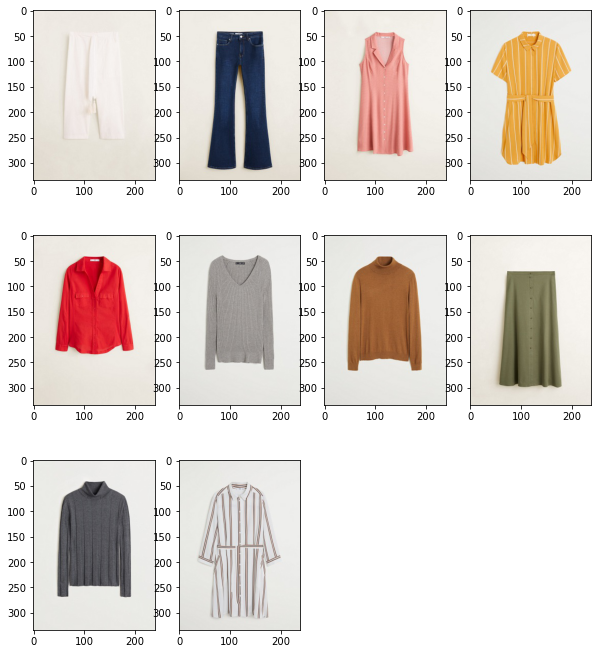

In [76]:
display_images(product_data['des_filename'].head(10))